In [1]:
import numpy as np
import argparse
import time
import os
import sys
import pickle
from itertools import chain
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import cm

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

from datasets import inputs, sf_inputs_discrete
from sr_model.models.models import AnalyticSR, STDP_SR, OjaRNN, Linear
import configs
from eval import eval

device = 'cpu'

/Users/chingfang/Code/sr-project/datasets/inputs.py:12: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")
/Users/chingfang/Code/sr-project/datasets/sf_inputs_discrete.py:19: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")


In [2]:
with open('../trained_models/03_oja_sf_gradient_vis/results.p', 'rb') as f:
    results = pickle.load(f)

In [3]:
_results = results['saved_grads'][1]

In [4]:
steps = _results['steps']
rnn = _results['rnn']
oja = _results['oja']
dset = _results['dset']

In [5]:
dset.left_right_stay_prob

array([0.77777778, 0.11111111, 0.11111111])

In [6]:
feature_map = dset.feature_maker.feature_map
argsort = np.argsort(np.argmax(feature_map, axis=1))

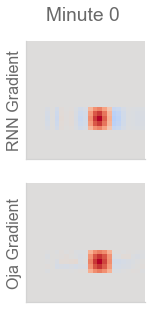

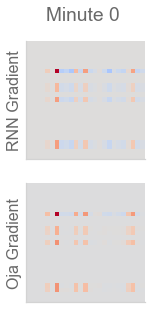

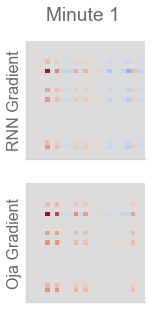

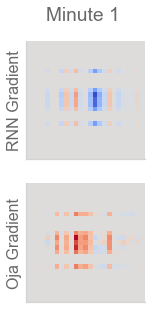

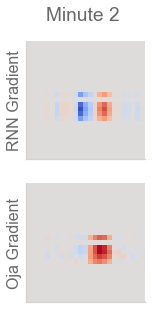

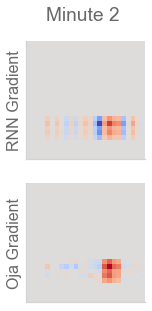

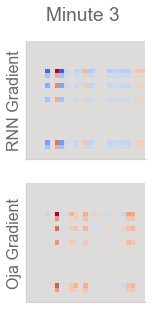

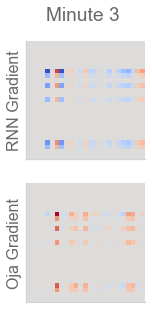

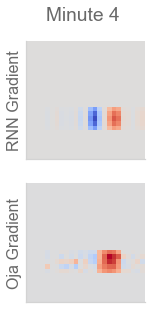

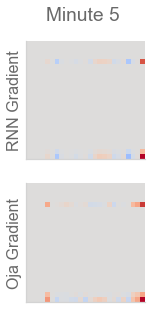

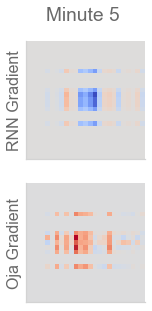

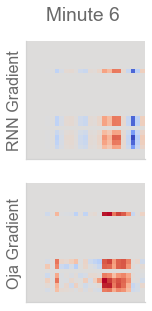

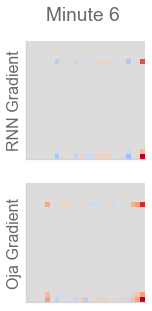

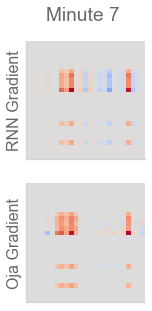

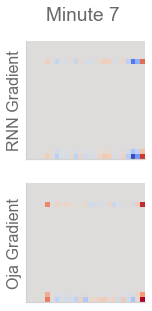

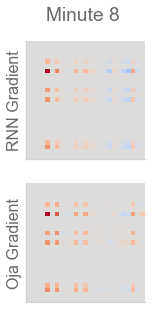

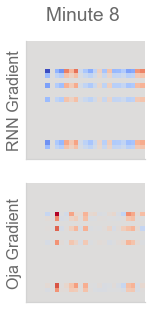

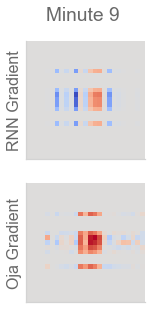

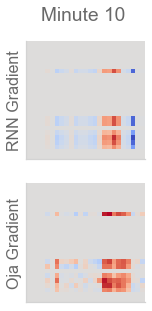

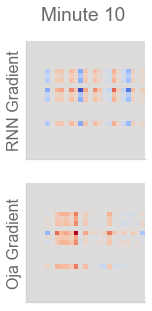

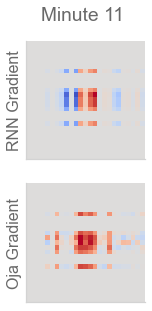

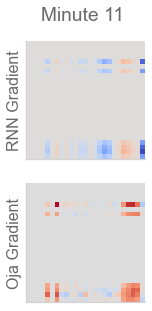

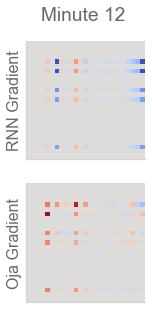

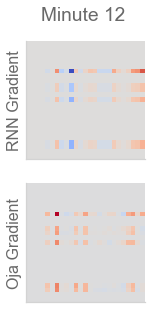

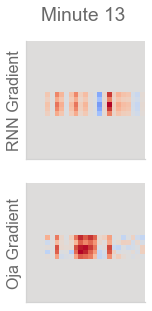

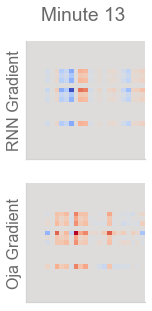

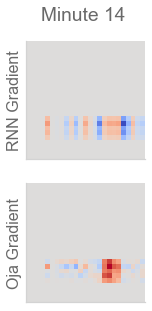

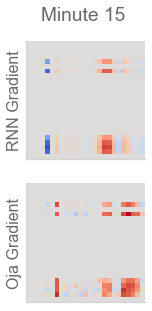

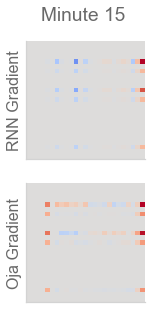

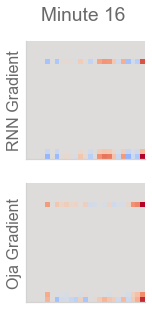

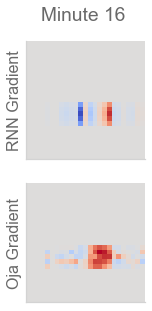

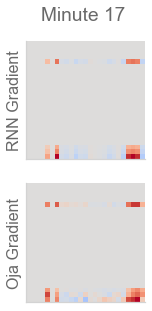

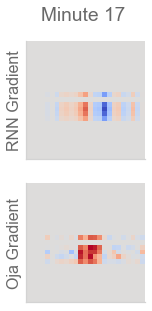

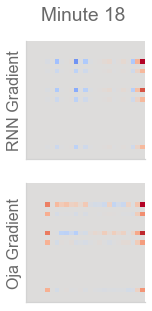

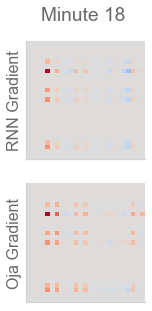

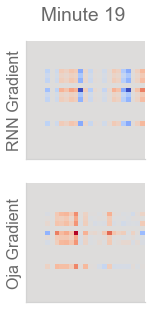

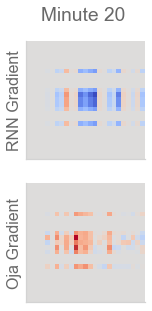

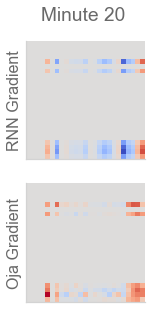

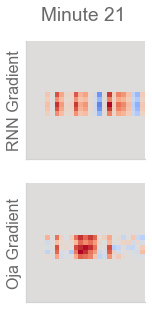

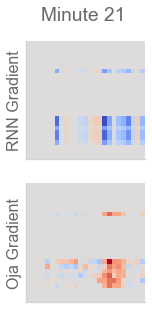

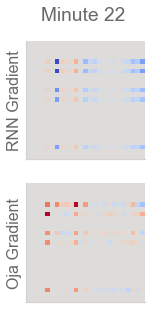

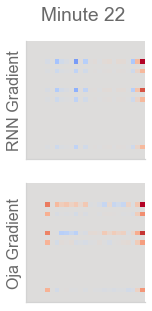

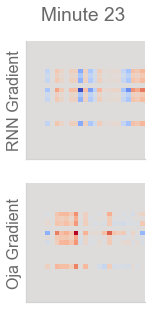

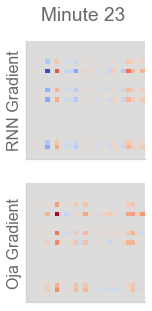

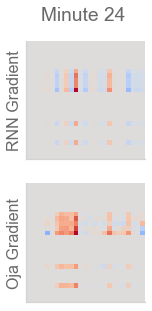

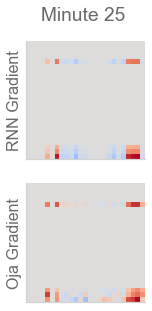

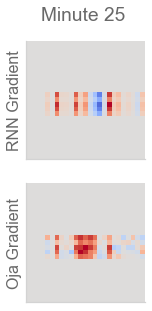

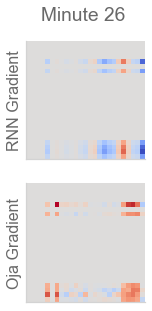

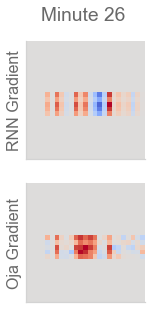

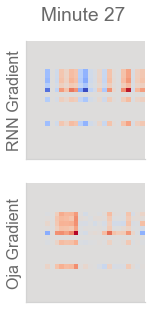

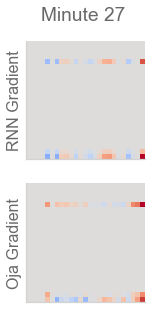

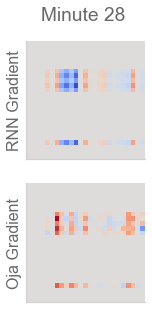

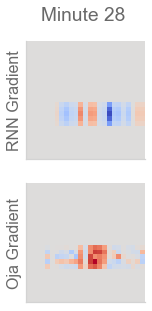

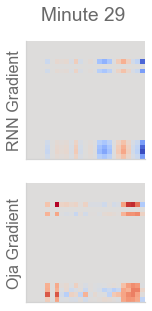

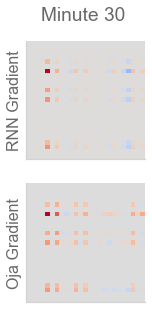

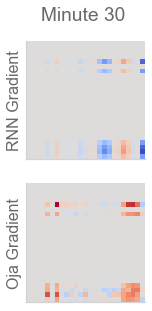

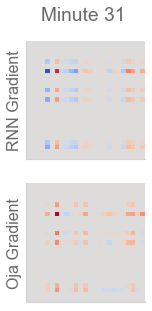

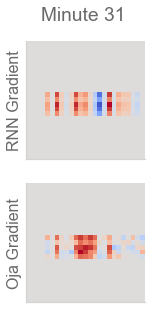

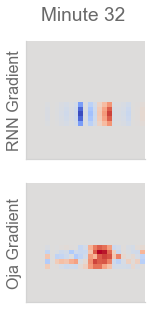

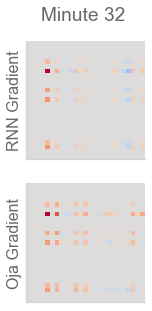

In [10]:
for idx in range(len(rnn)):
    fig, axs = plt.subplots(2, 1, figsize=(6.4*0.5, 4.8))
    rnn_grad = rnn[idx][argsort][:,argsort]
    oja_grad = oja[idx][argsort][:,argsort]
    c_lim = np.abs(rnn_grad).max()
    axs[0].imshow(rnn_grad, vmin=-c_lim, vmax=c_lim, cmap='coolwarm')
    axs[0].set_ylabel('RNN Gradient')
    c_lim = np.abs(oja_grad).max()
    axs[1].imshow(oja_grad, vmin=-c_lim, vmax=c_lim, cmap='coolwarm')
    axs[1].set_ylabel('Oja Gradient')
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
    minute = (idx*100)/configs.dt_to_sec/60.
    plt.suptitle(f'Minute {int(minute)}')
    plt.show()
    print("=================")